In [9]:
import pandas as pd
import os


In [10]:
csv_file_path = r'C:\Users\shivb\Downloads\Analyze Your Runkeeper Fitness Data\datasets\cardioActivities.csv'  
file_exists = os.path.isfile(csv_file_path)

print(f"File exists: {file_exists}")

File exists: True


In [11]:
# 1. Obtain and review raw data
import zipfile

# Path to the ZIP file
zip_file_path = r'C:\Users\shivb\Downloads\fitness_data.zip'
runkeeper_file = 'Analyze Your Runkeeper Fitness Data/datasets/cardioActivities.csv'

with zipfile.ZipFile(zip_file_path, 'r') as z:
    z.extract(runkeeper_file, 'C:\\Users\\shivb\\Downloads')

runkeeper_file_path = r'C:\Users\shivb\Downloads\Analyze Your Runkeeper Fitness Data\datasets\cardioActivities.csv'
df_activities = pd.read_csv(runkeeper_file_path, parse_dates=['Date'], index_col='Date')

print(df_activities.sample(3))

print(df_activities.info())


                                              Activity Id     Type Route Name  \
Date                                                                            
2016-09-22 18:52:22  1454fad1-9940-448a-82fb-8ae9f3bf05e5  Running        NaN   
2018-07-31 18:25:24  a929c543-bc2e-446d-9431-40e60fbc6270    Other        NaN   
2016-01-14 18:40:08  f5f333b1-3453-4555-aafd-d19923d0b84e  Running        NaN   

                     Distance (km) Duration Average Pace  \
Date                                                       
2016-09-22 18:52:22           6.96    37:14         5:21   
2018-07-31 18:25:24          16.80  1:07:21         4:01   
2016-01-14 18:40:08           7.00    41:18         5:54   

                     Average Speed (km/h)  Calories Burned  Climb (m)  \
Date                                                                    
2016-09-22 18:52:22                 11.22            494.0         63   
2018-07-31 18:25:24                 14.97           1075.0        202   
2

In [12]:
print(df_activities.columns)

Index(['Activity Id', 'Type', 'Route Name', 'Distance (km)', 'Duration',
       'Average Pace', 'Average Speed (km/h)', 'Calories Burned', 'Climb (m)',
       'Average Heart Rate (bpm)', 'Friend's Tagged', 'Notes', 'GPX File'],
      dtype='object')


In [13]:
print(df_activities.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [31]:
type_counts=df_activities['Type'].value_counts()
print(type_counts)

Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64


In [37]:
df_activities['Type'].replace('Other','unicycling', inplace=True)

In [38]:
type_counts=df_activities['Type'].value_counts()
print(type_counts)

Type
Running       459
Cycling        29
Walking        18
unicycling      2
Name: count, dtype: int64


In [39]:
print("Activity types after replacement:")
print(df_activities['Type'].value_counts())

Activity types after replacement:
Type
Running       459
Cycling        29
Walking        18
unicycling      2
Name: count, dtype: int64


In [51]:
# 2. Data preprocessing
import pandas as pd

# Load your dataset (replace with actual path)
csv_file_path = r'C:\Users\shivb\Downloads\Analyze Your Runkeeper Fitness Data\datasets\cardioActivities.csv'
df_activities = pd.read_csv(csv_file_path)

# Columns to drop
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Drop columns
df_activities.drop(columns=cols_to_drop, inplace=True)

# Verify columns have been dropped
print("Columns after dropping specified columns:")
print(df_activities.columns)


Columns after dropping specified columns:
Index(['Date', 'Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')


In [40]:
# 3. Dealing with missing values
missing_values_count=df_activities.isna().sum()
print(missing_values_count)

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


In [41]:
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
avg_hr_walk = df_activities[df_activities['Type'] == 'Walking']['Average Heart Rate (bpm)'].mean()
avg_hr_uni = df_activities[df_activities['Type'] == 'unicycling']['Average Heart Rate (bpm)'].mean()


In [42]:
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()
df_uni = df_activities[df_activities['Type'] == 'unicycling'].copy()

In [45]:
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)
df_uni['Average Heart Rate (bpm)'].fillna(int(avg_hr_uni), inplace=True)

In [46]:
missing_values_count1=df_activities['Type'].isna().sum()
print(missing_values_count1)

0


In [47]:
# 4. Plot running data
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

In [14]:
print(df_activities.columns)

Index(['Activity Id', 'Type', 'Route Name', 'Distance (km)', 'Duration',
       'Average Pace', 'Average Speed (km/h)', 'Calories Burned', 'Climb (m)',
       'Average Heart Rate (bpm)', 'Friend's Tagged', 'Notes', 'GPX File'],
      dtype='object')


In [50]:
csv_file_path = r'C:\Users\shivb\Downloads\Analyze Your Runkeeper Fitness Data\datasets\cardioActivities.csv'
df_activities = pd.read_csv(csv_file_path)
print(df_activities.columns)

Index(['Date', 'Activity Id', 'Type', 'Route Name', 'Distance (km)',
       'Duration', 'Average Pace', 'Average Speed (km/h)', 'Calories Burned',
       'Climb (m)', 'Average Heart Rate (bpm)', 'Friend's Tagged', 'Notes',
       'GPX File'],
      dtype='object')


In [52]:
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

In [54]:
df_activities['Date']=pd.to_datetime(df_activities['Date'])

In [55]:
print(df_activities.columns)

Index(['Date', 'Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')


In [75]:
print(df_subset.head())


Empty DataFrame
Columns: [Date, Type, Distance (km), Duration, Average Pace, Average Speed (km/h), Climb (m), Average Heart Rate (bpm)]
Index: []


First few rows of df_subset:
                 Date     Type  Distance (km) Duration Average Pace  \
0 2018-11-11 14:05:12  Running          10.44    58:40         5:37   
1 2018-11-09 15:02:35  Running          12.84  1:14:12         5:47   
2 2018-11-04 16:05:00  Running          13.01  1:15:16         5:47   
3 2018-11-01 14:03:58  Running          12.98  1:14:25         5:44   
4 2018-10-27 17:01:36  Running          13.02  1:12:50         5:36   

   Average Speed (km/h)  Climb (m)  Average Heart Rate (bpm)  
0                 10.68        130                     159.0  
1                 10.39        168                     159.0  
2                 10.37        171                     155.0  
3                 10.47        169                     158.0  
4                 10.73        170                     154.0  


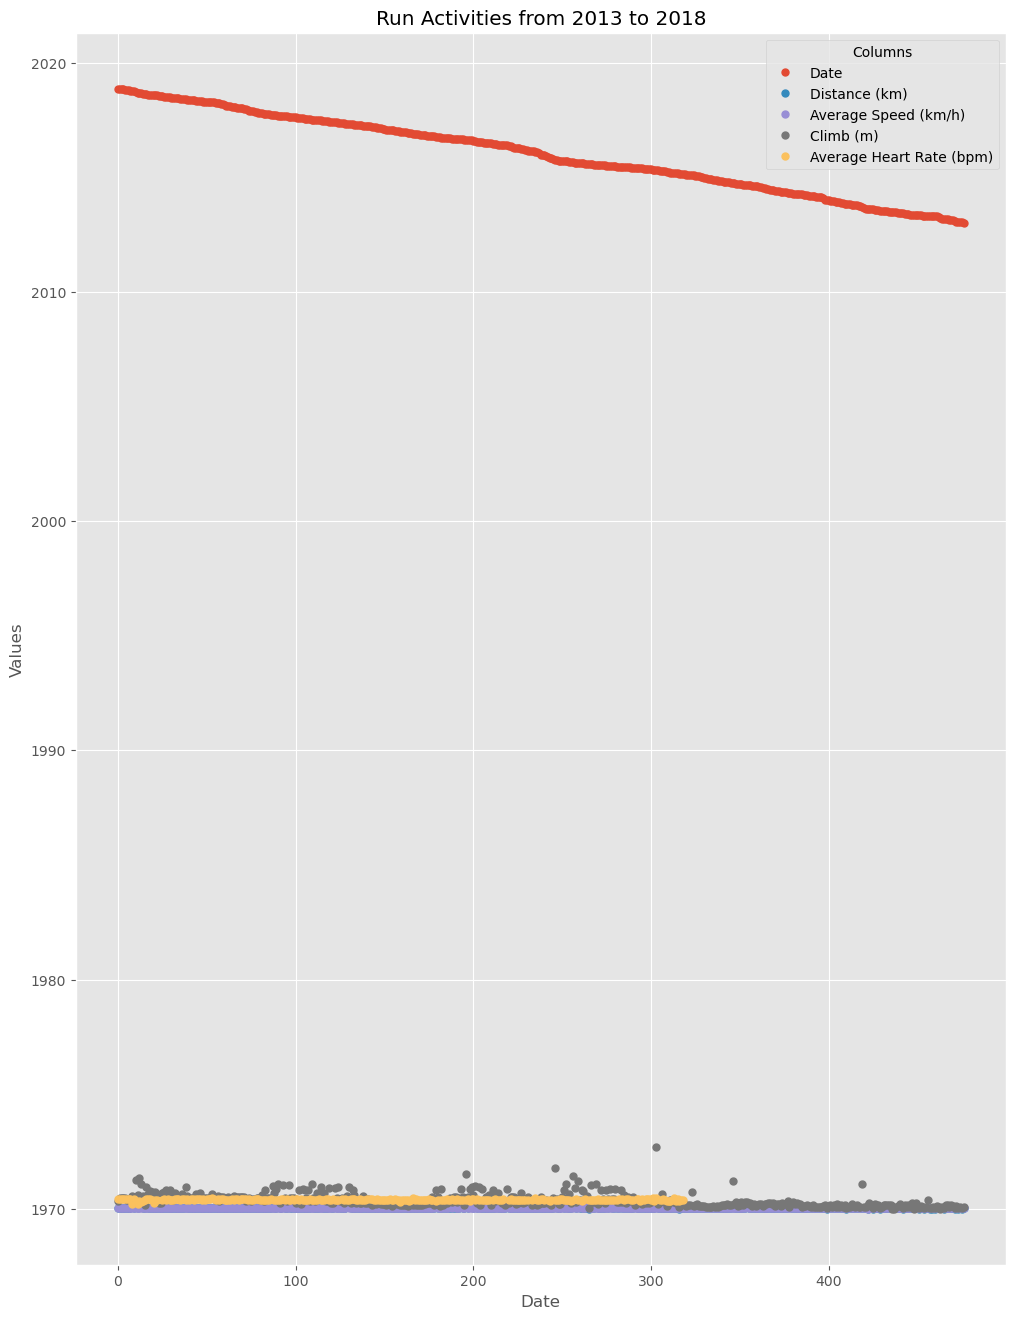

Summary statistics of df_subset:
                                Date  Distance (km)  Average Speed (km/h)  \
count                            477     477.000000            477.000000   
mean   2015-12-31 22:28:02.800838656      12.315514             11.481761   
min              2013-01-02 18:35:11       0.760000              1.040000   
25%              2014-08-21 18:49:00       8.650000             10.520000   
50%              2015-12-27 13:14:59      12.430000             11.100000   
75%              2017-06-04 16:01:52      14.320000             11.660000   
max              2018-11-11 14:05:12      49.180000             24.330000   
std                              NaN       5.983447              2.449572   

        Climb (m)  Average Heart Rate (bpm)  
count  477.000000                294.000000  
mean   134.976939                143.530612  
min      0.000000                 77.000000  
25%     61.000000                140.000000  
50%    102.000000                144.000000

In [83]:
print("First few rows of df_subset:")
print(df_subset.head())

# Plot the subset with basic parameters
ax = df_subset.plot(
    sharex=False,
    figsize=(12, 16),
    linestyle='none',
    marker='o',
    markersize=5  # Increase marker size for visibility
)
plt.title('Run Activities from 2013 to 2018')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(title='Columns')
plt.show()

# Print summary statistics of the subset
print("Summary statistics of df_subset:")
print(df_subset.describe())


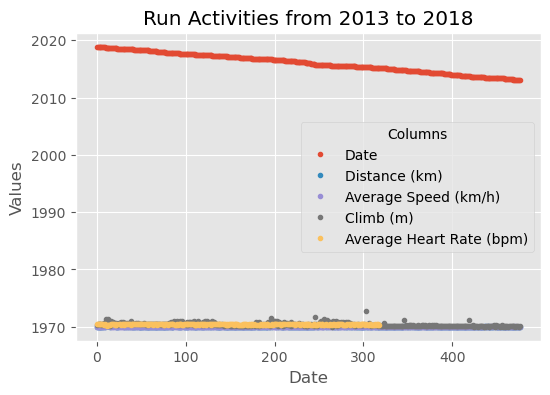

In [87]:
df_subset.plot(
    sharex=False,
    figsize=(6, 4),
    linestyle='none',
    marker='o',
    markersize=3
)
plt.title('Run Activities from 2013 to 2018')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(title='Columns')
plt.show()

In [17]:
print(df_activities.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [19]:
import pandas as pd
import numpy as np

# Sample running data creation for demonstration (replace this with your actual data loading)
data = {
    'date': pd.date_range(start='2015-01-01', end='2018-12-31', freq='D'),
    'run_distance': np.random.uniform(2, 10, size=1461)  # Random distances for demonstration
}
df_activities = pd.DataFrame(data)

# Convert the date column to datetime if it's not already
df_activities['date'] = pd.to_datetime(df_activities['date'])

# Set the date column as the index
df_activities.set_index('date', inplace=True)

# Sort the index to ensure it's in the correct order for slicing
df_activities.sort_index(inplace=True)

# Now perform the slicing for the specified date range
start_date = '2015-01-01'
end_date = '2018-12-31'
runs_subset_2015_2018 = df_activities.loc[start_date:end_date]

# Verify the columns in the subset
print("Columns in runs_subset_2015_2018:")
print(runs_subset_2015_2018.columns)

# Check the first few rows of the subset
print("\nFirst few rows of runs_subset_2015_2018:")
print(runs_subset_2015_2018.head())

# Get summary statistics of the subset
print("\nSummary statistics of runs_subset_2015_2018:")
print(runs_subset_2015_2018.describe())

# Check the data types of each column
print("\nData types in runs_subset_2015_2018:")
print(runs_subset_2015_2018.dtypes)

# Check for missing values in the subset
print("\nMissing values in runs_subset_2015_2018:")
print(runs_subset_2015_2018.isnull().sum())


Columns in runs_subset_2015_2018:
Index(['run_distance'], dtype='object')

First few rows of runs_subset_2015_2018:
            run_distance
date                    
2015-01-01      9.495748
2015-01-02      9.604262
2015-01-03      7.223741
2015-01-04      8.312585
2015-01-05      7.668184

Summary statistics of runs_subset_2015_2018:
       run_distance
count   1461.000000
mean       6.049835
std        2.278289
min        2.009379
25%        4.230053
50%        6.030040
75%        8.024435
max        9.999815

Data types in runs_subset_2015_2018:
run_distance    float64
dtype: object

Missing values in runs_subset_2015_2018:
run_distance    0
dtype: int64


In [26]:
print(runs_subset_2015_2018.columns)

Index(['run_distance', 'heart_rate'], dtype='object')


In [23]:
# 5. Running statistics
import pandas as pd
import numpy as np




# Calculate annual statistics
print('How my average run looks in last 4 years:')
annual_statistics = runs_subset_2015_2018.resample('A').mean()
display(annual_statistics)

# Calculate weekly statistics
print('Weekly averages of last 4 years:')
weekly_statistics = runs_subset_2015_2018.resample('W').mean()
display(weekly_statistics)

# Mean weekly counts
weekly_counts = runs_subset_2015_2018.resample('W').size()
weekly_counts_average = weekly_counts.mean()
print('How many trainings per week I had on average:', weekly_counts_average)


How my average run looks in last 4 years:


,run_distance
date,
2015-12-31,6.033747
2016-12-31,6.032168
2017-12-31,5.958050
2018-12-31,6.175422


Weekly averages of last 4 years:


,run_distance
date,
2015-01-04,8.659084
2015-01-11,4.877561
2015-01-18,6.886372
2015-01-25,6.732707
2015-02-01,5.481123
...,...
2018-12-09,7.349451
2018-12-16,5.594091
2018-12-23,4.937717


How many trainings per week I had on average: 6.957142857142857


In [25]:

import pandas as pd
import numpy as np

# Sample data for demonstration purposes
data = {
    'date': pd.date_range(start='2015-01-01', end='2018-12-31', freq='D'),
    'run_distance': np.random.uniform(2, 10, size=1461),  # Random distances for demonstration
    'heart_rate': np.random.uniform(120, 180, size=1461)  # Random heart rates for demonstration
}
df_run = pd.DataFrame(data)
df_run['date'] = pd.to_datetime(df_run['date'])
df_run.set_index('date', inplace=True)

# Check the columns in the original DataFrame
print("Columns in df_run:")
print(df_run.columns)

# Prepare data
start_date = '2015-01-01'
end_date = '2018-12-31'
runs_subset_2015_2018 = df_run.loc[start_date:end_date]

# Check the columns in the subset DataFrame
print("Columns in runs_subset_2015_2018:")
print(runs_subset_2015_2018.columns)

# Check the first few rows of the subset DataFrame to verify data
print("\nFirst few rows of runs_subset_2015_2018:")
print(runs_subset_2015_2018.head())


Columns in df_run:
Index(['run_distance', 'heart_rate'], dtype='object')
Columns in runs_subset_2015_2018:
Index(['run_distance', 'heart_rate'], dtype='object')

First few rows of runs_subset_2015_2018:
            run_distance  heart_rate
date                                
2015-01-01      2.283088  167.587827
2015-01-02      7.757807  147.113545
2015-01-03      5.523430  136.599264
2015-01-04      8.311198  149.918532
2015-01-05      4.334566  143.497074


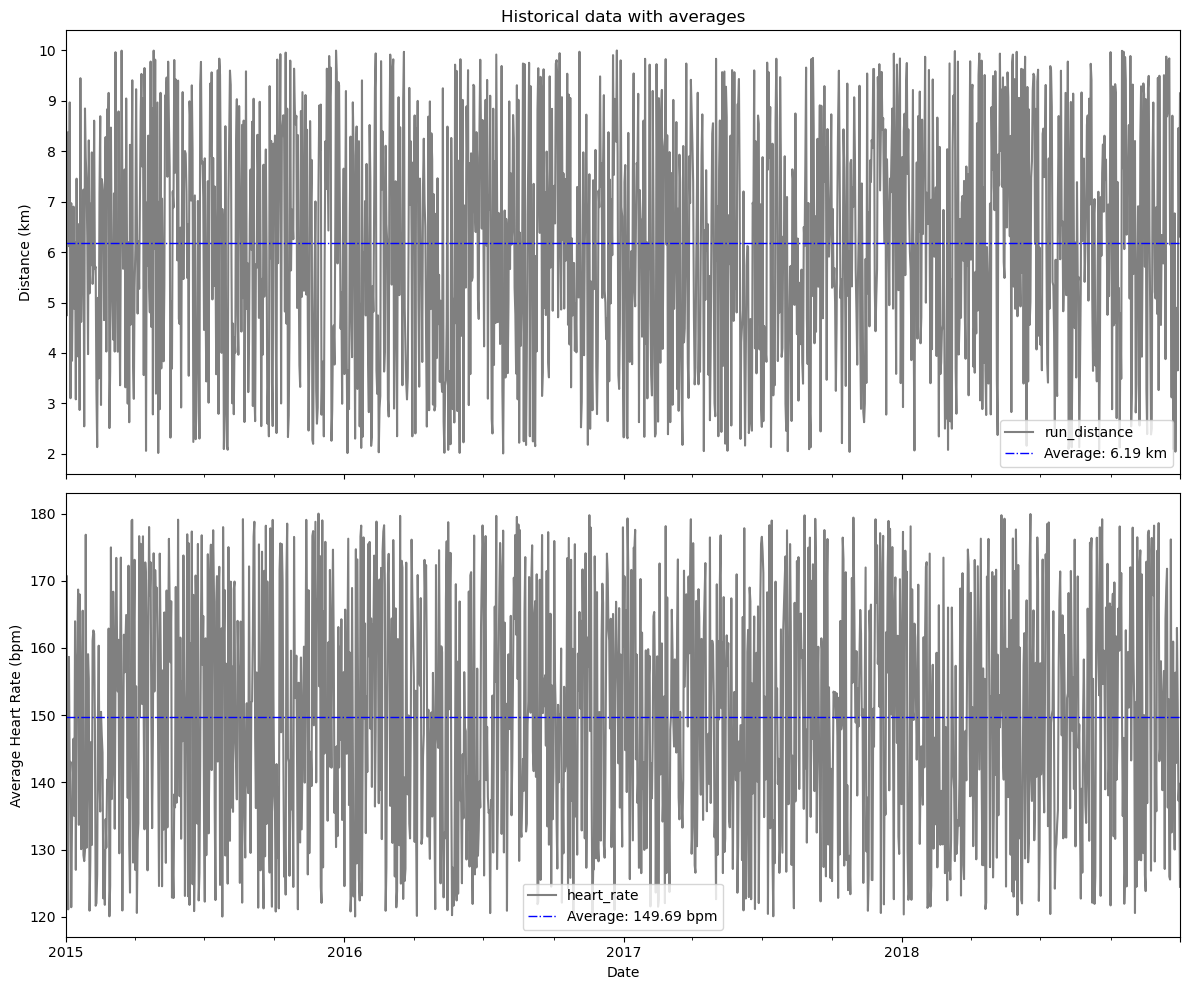

In [24]:
# 6. Visualization with averages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




# Prepare data
runs_subset_2015_2018 = df_run.loc['2015':'2018']
runs_distance = runs_subset_2015_2018['run_distance']
runs_hr = runs_subset_2015_2018['heart_rate']

# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot and customize first subplot
runs_distance.plot(ax=ax1, color='gray', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.', label=f'Average: {runs_distance.mean():.2f} km')
ax1.set_ylabel('Distance (km)')
ax1.legend()

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.', label=f'Average: {runs_hr.mean():.2f} bpm')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Heart Rate (bpm)')
ax2.legend()

# Show plot
plt.tight_layout()
plt.show()


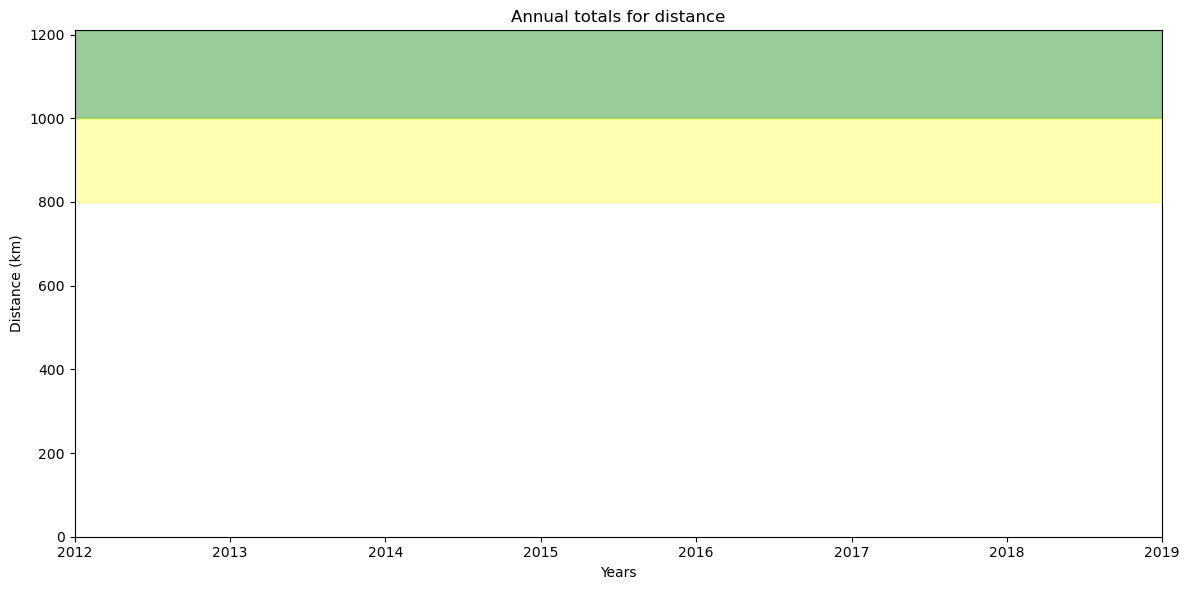

In [29]:
# 7. Did I reach my goals?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = {
    'date': pd.date_range(start='2013-01-01', end='2018-12-31', freq='D'),
    'run_distance': np.random.uniform(2, 10, size=2191)  # Random distances for demonstration
}
df_run = pd.DataFrame(data)
df_run['date'] = pd.to_datetime(df_run['date'])
df_run.set_index('date', inplace=True)


df_run_dist_annual = df_run['run_distance'].resample('Y').sum()


fig, ax = plt.subplots(figsize=(12, 6))


ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue', ax=ax)
ax.set(ylim=[0, 1210], 
       xlim=[pd.Timestamp('2012-01-01'), pd.Timestamp('2019-01-01')],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
plt.tight_layout()
plt.show()


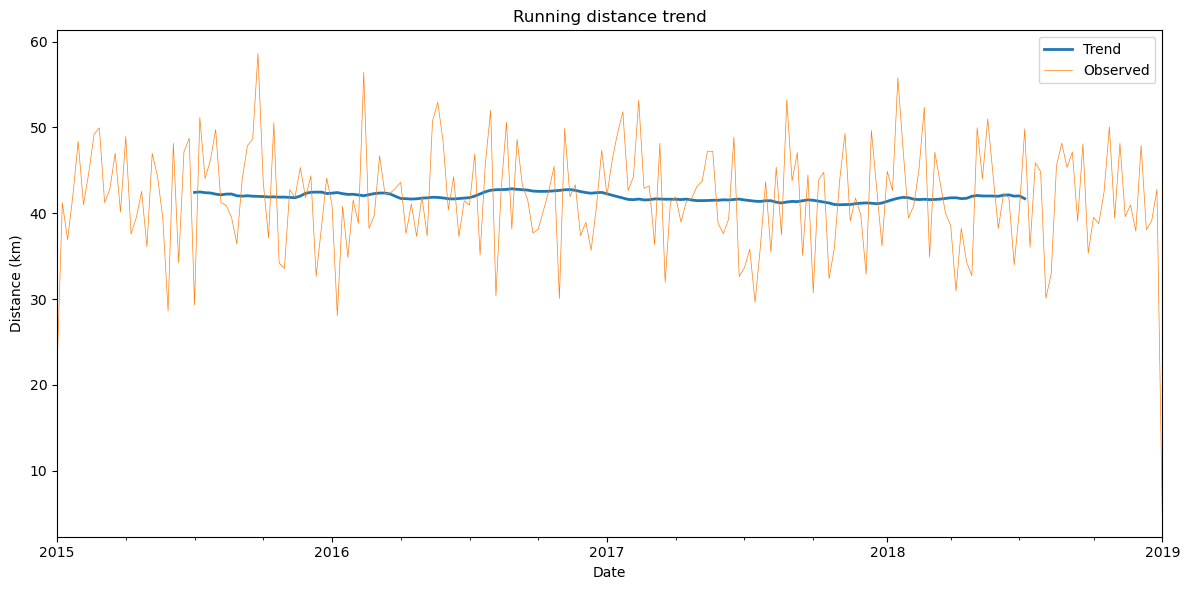

In [32]:
# 8. Am I progressing?
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_run_dist_wkly = df_run['run_distance'].resample('W').sum()

decomposed = sm.tsa.seasonal_decompose(df_run_dist_wkly, model='additive', period=52)

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot and customize
ax = decomposed.trend.plot(label='Trend', linewidth=2)
ax = decomposed.observed.plot(label='Observed', linewidth=0.5)

ax.legend()
ax.set_title('Running distance trend')
ax.set_xlabel('Date')
ax.set_ylabel('Distance (km)')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
#task 9